In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
np.array([ 10.,  13.,  14.,  44.,  64.,  70.,  72.,  73.,  78.,  82.,  85.,
        93.,  95., 116., 133., 138., 139., 142., 167., 172., 174., 177.,
       180., 189., 190., 193., 197., 200., 202., 206., 207., 228., 231.,
       232., 238., 239., 242., 245., 249.],dtype=int)

array([ 10,  13,  14,  44,  64,  70,  72,  73,  78,  82,  85,  93,  95,
       116, 133, 138, 139, 142, 167, 172, 174, 177, 180, 189, 190, 193,
       197, 200, 202, 206, 207, 228, 231, 232, 238, 239, 242, 245, 249])

In [65]:
i = int(10)
ifolder = str(i).zfill(3)
acb_old = "/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/Global_RUN/run_"+str(ifolder)+"/mnc_test_0002/sice.0000000000.t001.nc"#state.0000000000.t001.nc"
acb_old_new = "/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/Global_RUN/run_"+str(ifolder)+"/mnc_test_0003/sice.0000000000.t001.nc"#state.0000000000.t001.nc"
acb = "/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/Global_RUN2/run_"+str(ifolder)+"/mnc_test_0001/sice.0000000000.t001.nc"#state.0000000000.t001.nc"

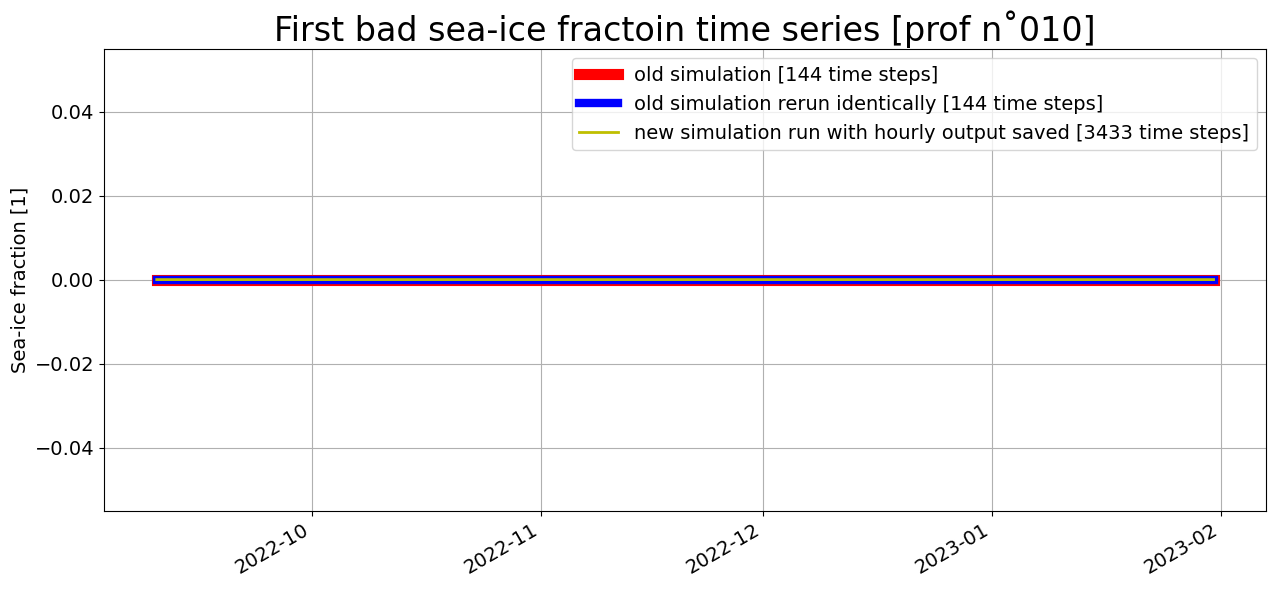

In [66]:
ds1 = xr.open_dataset(acb_old)
ds2 = xr.open_dataset(acb_old_new)
ds3 = xr.open_dataset(acb)
#-----------------------------------------------------------------------#
fig = plt.figure(figsize=[15,6], num=1);plt.clf();
ds1.si_AREA.squeeze().plot(color='r',linewidth=8,label='old simulation [144 time steps]')
ds2.si_AREA.squeeze().plot(color='b',linewidth=6,label='old simulation rerun identically [144 time steps]')
ds3.si_AREA.squeeze().plot(color='y',linewidth=2,label='new simulation run with hourly output saved [3433 time steps]')
plt.title('First bad sea-ice fractoin time series [prof n˚'+str(ifolder)+']',fontsize=24)
plt.grid()
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.ylabel('Sea-ice fraction [1]',fontsize=14)
plt.xlabel(' ',fontsize=14)
plt.legend(fontsize=14)

In [54]:
ds1.si_AREA.squeeze().size,ds2.si_AREA.squeeze().size,ds3.si_AREA.squeeze().size

(144, 144, 3433)

In [63]:
#-------------------------------------------------------------------------------------------------------|
## SASSIE final data collected files directory ---------------------------------------------------------|
Final_SASSIE    = '/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/Final_SASSIE_update/'#------------|
## Data files directory --------------------------------------------------------------------------------|
CastAway_CTD    = 'CastAway_CTD/'#----------------------------------------------------------------------|
#-------------------------------------------------------------------------------------------------------|

## Cast away CTD data list
CastAway_CTD_content = os.listdir(Final_SASSIE+CastAway_CTD)
CastAway_CTD_content

CTD_cast = xr.open_dataset(Final_SASSIE+CastAway_CTD+CastAway_CTD_content[0])
CTD_cast

# Extraction of profiles

# in situ temperature [˚C]
temp = CTD_cast.temperature
# in situ pratical salinity [PSU]
sal = CTD_cast.salinity
# longitude & latitude 
lon = CTD_cast.longitude
lat = CTD_cast.latitude
# depth/pressure
pres = CTD_cast.pressure
# time related to each profile
Time = CTD_cast.time
# conversion of pratical salinity to absolute salinity [SA,g/kg]
SA = gsw.SA_from_SP(sal,pres,lon,lat)
# conversion of temp to potential temperature [˚C]
potemp = gsw.pt_from_t(SA,temp,pres,p_ref = 0)

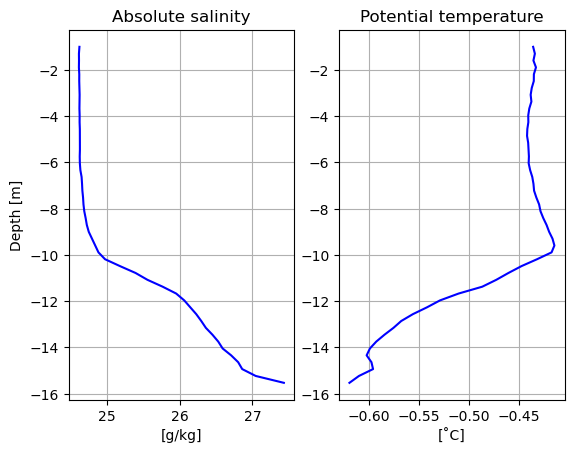

In [67]:
plt.subplot(1,2,1)
plt.plot(SA[:,i],-pres[:,i-1],'-b')
plt.title('Absolute salinity')
plt.xlabel("[g/kg]")
plt.ylabel("Depth [m]")
plt.grid()
plt.subplot(1,2,2)
plt.plot(potemp[:,i],-pres[:,i-1],'-b')
plt.title('Potential temperature')
plt.xlabel("[˚C]")
plt.grid()

In [31]:
SA.shape

(311, 250)